## Does the Indian stock market react to the transition risk of climate change?

Through this project, we intend to analyze the reaction of the Indian stock market to global climate-related conferences and news. We have used a **top-down approach** to study the same. Starting from the impact on the overall stock market indices, we break it down further by studying the major industry drivers of that impact through an economic analysis. 

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
#For visualizations
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
pip install pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 924.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/3c/d2/11533f0bc47ff4d828a20cfb702f3453fe714bd5b475fcdc8cec6e6b7dcf/lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/60/bf/70efe5138327c7ccf34f0a870ac97d41d3c06fecb2ec8dc2060ff39aadc9/yfinance-0.2.30-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 6.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.16.3-cp310-cp310-linux_x86_64.whl size=977730 sha256=11082f1a253ad554ecbe29fb360610fe14ceeab65c4074e2e2ebd31817582bce
  Stored in directory: /home/codespace/.cache/pip/wheels/c8/ac/6d/ad6d828725ffbe3abc508c95d25dd0c5fcc63539ae47913790
Successfully built peewee
Note: you ma

In [8]:
pip install panel

  Obtaining dependency information for panel from https://files.pythonhosted.org/packages/ef/3b/d5b3596e11dd485c8276a5e9143dbdeea6a80f6d8df952e947644eb57b36/panel-1.2.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for bokeh<3.3.0,>=3.1.1 from https://files.pythonhosted.org/packages/84/60/33f23dbb15fcd785d6287bdd6fa8c9d836dacb40e21c14aad41a57a0ec0f/bokeh-3.2.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pyviz-comms>=0.7.4 from https://files.pythonhosted.org/packages/67/bc/f698554d2a179c3ae40adba328db1bc552c0ea5832101503200ab1904dd8/pyviz_comms-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for xyzservices>=2021.09.1 from https://files.pythonhosted.org/packages/50/d7/2ca7f65c189aa71b5a9dfeaabc0b4ab8d50bead74a7863428c579737d625/xyzservices-2023.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for markdown from https://files.p

In [10]:
pip install hvplot

  Obtaining dependency information for hvplot from https://files.pythonhosted.org/packages/1c/4a/87bf45985ba1fa9614ca9da82e4d8b91e25952da4eb72239ddb8bc4d07f9/hvplot-0.8.4-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.9 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for holoviews>=1.11.0 from https://files.pythonhosted.org/packages/90/4a/6e78bb099659c3d359f1f388c06b17bf344ceaddb2a3ad63b0ce87191cde/holoviews-1.17.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 42.2 MB/s eta 0:00:0000:01:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

##### We focus on the most significant climate-related events that took place between the period of 2011 and 2022.
The significance of the COPs was decided on the basis of the negotiations that went on in that particular conference and whether the nations were successful in coming to a common consensus on its objectives. Additionally, the US withdrawal decision from the Paris Agreement has been considered as it altered the potential impact of the previously ratified agreement.

In [12]:
climate_treaties = pn.widgets.RadioButtonGroup(name='policy', 
                                    options=['COP17','COP18','COP19','COP21','COP22',
                                                            'US Paris Agreement Withdrawal Announcement','COP23',
                                                            'COP25','COP26','COP27'],
                                    button_type='success')

Here, we define the period of study for each treaty, including a window of 15 days before and after the conference. This has been done to study the impact of that particular treaty on the stock market given the anticipated result of the event.

In [13]:
policy_dict = {"COP17": ["2011-11-10","2011-12-31"],
               "COP18": ["2012-11-10","2012-12-25"],
               "COP19": ["2013-10-26","2013-12-08"],
               "COP21": ["2015-11-15","2015-12-27"],
               "COP22": ["2016-10-22","2016-12-04"],
               "US Paris Agreement Withdrawal Announcement": ["2017-05-20","2017-06-10"],
               "COP23": ["2017-10-21","2017-12-03"],
               "COP25": ["2019-11-17","2019-12-28"],
               "COP26": ["2021-10-16","2021-11-28"],
               "COP27": ["2022-10-20","2022-12-05"]}

To analyse the impact of different treaties on the Indian stock market, you can select any particular event from the given options and run the subsequent commands.

In [14]:
climate_treaties

RadioButtonGroup(button_type='success', name='policy', options=['COP17', 'COP18', ...], value='COP17')

In [15]:
climate_treaties.value

'COP17'

We web scrape data from Yahoo Finance to extract stock market information for the relevant period  and feed those dates to study the i.

In [16]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [17]:
SES_data = pdr.get_data_yahoo(['^BSESN'], start=policy_dict[climate_treaties.value][0], end=policy_dict[climate_treaties.value][1])

[*********************100%%**********************]  1 of 1 completed


In [18]:
SES_data['Adj Close'].isnull().sum()

0

In [19]:
SES_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-11,17187.890625,17279.230469,17096.839844,17192.820312,17192.820312,18200
2011-11-14,17348.519531,17391.990234,17094.429688,17118.740234,17118.740234,15000
2011-11-15,17081.619141,17172.089844,16837.560547,16882.669922,16882.669922,18000
2011-11-16,16872.300781,16878.300781,16641.650391,16775.869141,16775.869141,19600
2011-11-17,16754.679688,16807.150391,16408.500000,16461.710938,16461.710938,17000


In [20]:
NIF_data = pdr.get_data_yahoo(['^NSEI'], start=policy_dict[climate_treaties.value][0], end=policy_dict[climate_treaties.value][1])

[*********************100%%**********************]  1 of 1 completed


In [21]:
NIF_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-11-11,5159.750000,5198.600098,5142.250000,5168.850098,5168.850098,0
2011-11-14,5217.350098,5228.899902,5140.549805,5148.350098,5148.350098,0
2011-11-15,5131.200195,5158.750000,5052.850098,5068.500000,5068.500000,0
2011-11-16,5059.100098,5065.200195,4989.500000,5030.450195,5030.450195,0
2011-11-17,5027.100098,5036.799805,4919.450195,4934.750000,4934.750000,0


To assess the economy-wide impact of a particular treaty, we study the **daily adjusted closing price** as our dependent variable, for both, NIFTY and SENSEX data.

In [22]:
SES_prices = DataFrame(SES_data['Adj Close'])
NIF_prices = DataFrame(NIF_data['Adj Close'])
prices_policy = pd.concat([SES_prices, NIF_prices], axis=1)
prices_policy.columns = ['SENSEX', 'NIFTY50']
prices_policy.fillna(prices_policy.mean(), inplace=True)
prices_policy.head()

,SENSEX,NIFTY50
Date,,
2011-11-11,17192.820312,5168.850098
2011-11-14,17118.740234,5148.350098
2011-11-15,16882.669922,5068.500000
2011-11-16,16775.869141,5030.450195
2011-11-17,16461.710938,4934.750000


The shift in mood as a result of the negotiated outcome of a conference is best expressed by the partipants' demand-supply behaviour as reflected by the **ajusted closing price**.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

AttributeError: 'Axes' object has no attribute 'right_ax'

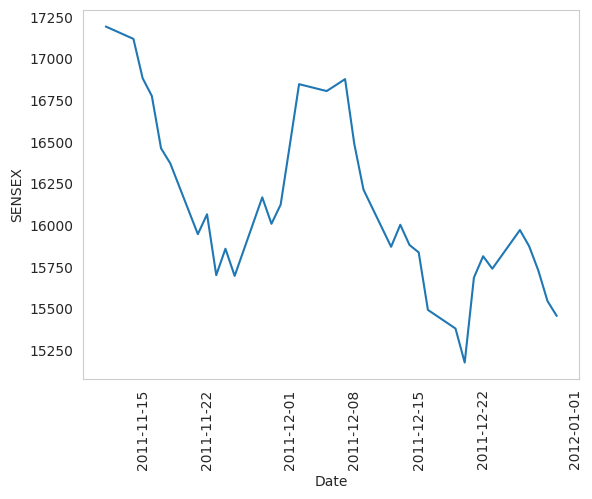

In [23]:
plot = sns.lineplot(prices_policy['SENSEX'], legend=True)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.grid(False)
plot.right_ax.grid(False)

Now, to look at the major industries driving these trends, we study the effect of the conferences on the oil exploration industry which is likely to be largely impacted by a climate-related nevent. And to further this analysis, we identify the complements of the oil exploration industry as oil refineries, gas distribution and its substitute as the renewable energy sector. 

In [25]:
#Complements
oilexp = ['ONGC.BO','PETRONET.NS','RELIANCE.NS']
oilref = ['BPCL.NS','HINDPETRO.NS','CHENNPETRO.NS']
gasdist = ['GAIL.NS','REFEX.NS']
stock_dict = {'oilexp': oilexp,'oilref': oilref,'gasdist': gasdist}
stocks_df = DataFrame()
compind_df_clt = DataFrame()

for cat_name in stock_dict.keys():
    stk_l = []
    for stock in stock_dict[cat_name]:
        stocks_df[stock.replace('.','')] = pdr.get_data_yahoo(stock, start=policy_dict[climate_treaties.value][0], end=policy_dict[climate_treaties.value][1])['Adj Close']
        stock_n = stock.replace('.','')
        stk_l.append(stock_n)
    compind_df_clt.index = stocks_df.index
    compind_df_clt[str(cat_name) + '_mean'] = stocks_df[stk_l].mean(axis=1).values.tolist()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
compind_df_clt.head()

,oilexp_mean,oilref_mean,gasdist_mean
Date,,,
2011-11-11,197.369222,83.108950,33.077276
2011-11-14,195.389075,82.238091,33.302425
2011-11-15,192.444805,81.266446,32.259204
2011-11-16,190.701302,79.716975,30.950855
2011-11-17,183.610906,78.457976,30.364785


In [27]:
stocks_df.head()

,ONGCBO,PETRONETNS,RELIANCENS,BPCLNS,HINDPETRONS,CHENNPETRONS,GAILNS,REFEXNS
Date,,,,,,,,
2011-11-11,129.682541,60.276016,402.149109,53.769615,37.876709,157.680527,53.404797,12.749755
2011-11-14,127.438255,60.509029,398.219940,52.927582,37.305580,156.481110,53.855095,12.749755
2011-11-15,126.267281,59.774166,391.292969,51.816097,36.661541,155.321701,52.401276,12.117132
2011-11-16,128.462784,58.411995,385.229126,49.650875,34.778034,154.722015,50.368534,11.533175
2011-11-17,125.559845,57.372452,367.900421,48.933945,34.036785,152.403198,49.731689,10.997881


In [28]:
stock_rets_clt = compind_df_clt.pct_change()

To establish that the industries stated above are complements to the oil exploration industry, we construct a **pair plot** and a **correlation heatmap** that confirms this.

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

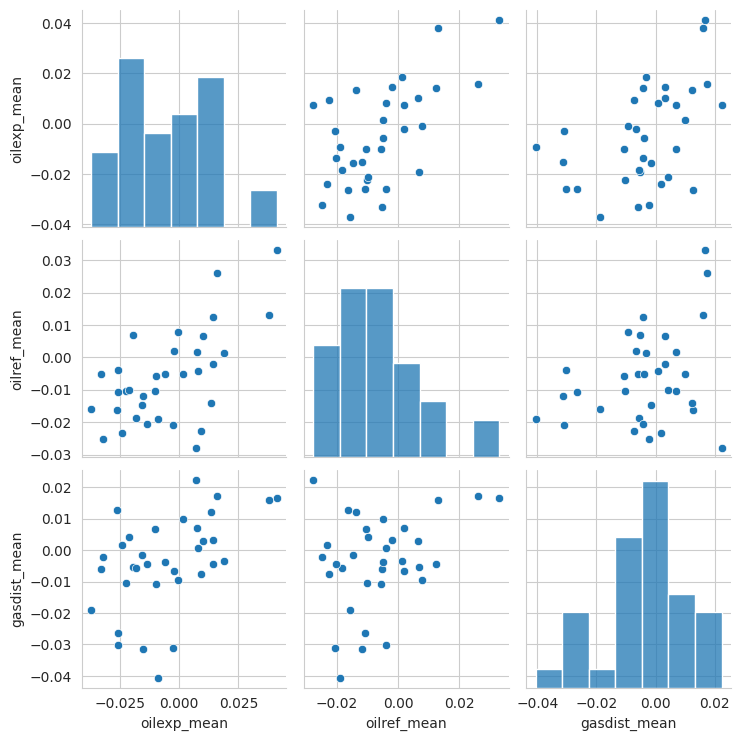

In [29]:
sns.pairplot(stock_rets_clt.dropna())

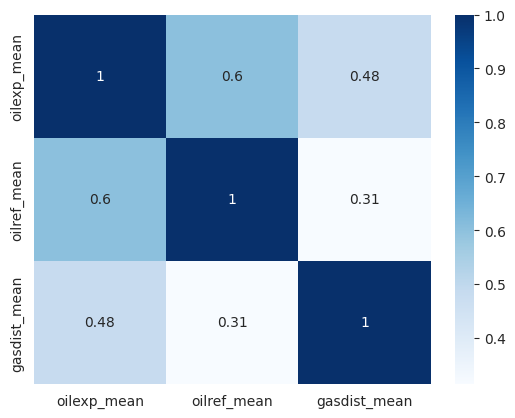

In [30]:
dataplot = sns.heatmap(stock_rets_clt.corr(), cmap="Blues", annot=True)
plt.show()
#sns.corrplot(stock_rets.dropna(),annot=True)

Having established the relationships between different industries, we plot the impact of the treaties on the respective industries.